<a href="https://colab.research.google.com/github/ChristopherianSulaiman/CSE_151A/blob/main/CSE_151A_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!git clone https://github.com/devPach4545/CSE_151A.git

fatal: destination path 'CSE_151A' already exists and is not an empty directory.


DATA CLEANING




In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
'''
Just a list of whether or not we can use this field and how we could preprocess it

description - no(block of text that is too difficult to interpret)
belts - yes(encode as 0 or 1)
personal.injury - yes(encode as 0 or 1)
property.damage - yes(encode as 0 or 1)
commercial.license - yes(encode as 0 or 1)
commercial.vehicle - yes(encode as 0 or 1)
state - yes (encode the states with one hot encoding)
vehicletype - yes(encode the vehicles with one hot encoding)
year - yes?(its not a continous number)
make - yes(one hot encode the manufacturer)
model - yes(one hot encode)
color - yes(one hot encode)
charge - possible(one hot encode?)
did violation contribute to accident - yes(0 or 1)
race - yes(one hot)
gender - yes(one hot)
driver.city - yes(one hot)
driver licesnse state - yes(one hot)
arrest type - yes (one hot)
violation type - yes(one hot)
------------------------------------------------------------------------------------------
General comments about the data

-There are some outliers in the year column. Min is 0 and Max is 9999 which shouldn't be possible. Standard deviation is also 69 which is odd. We might need to just discard data with weird years
-Including race and gender might be a little weird(I'm not trying to get expelled).


'''

"\nJust a list of whether or not we can use this field and how we could preprocess it\n\ndescription - no(block of text that is too difficult to interpret)\nbelts - yes(encode as 0 or 1)\npersonal.injury - yes(encode as 0 or 1)\nproperty.damage - yes(encode as 0 or 1)\ncommercial.license - yes(encode as 0 or 1)\ncommercial.vehicle - yes(encode as 0 or 1)\nstate - yes (encode the states with one hot encoding)\nvehicletype - yes(encode the vehicles with one hot encoding)\nyear - yes?(its not a continous number)\nmake - yes(one hot encode the manufacturer)\nmodel - yes(one hot encode)\ncolor - yes(one hot encode)\ncharge - possible(one hot encode?)\ndid violation contribute to accident - yes(0 or 1)\nrace - yes(one hot)\ngender - yes(one hot)\ndriver.city - yes(one hot)\ndriver licesnse state - yes(one hot)\narrest type - yes (one hot)\nviolation type - yes(one hot)\n------------------------------------------------------------------------------------------\nGeneral comments about the data

In [8]:
data = pd.read_csv('/content/CSE_151A/traffic_violations.csv')
data

,Description,Belts,Personal.Injury,Property.Damage,Commercial.License,Commercial.Vehicle,State,VehicleType,Year,Make,...,Color,Charge,Contributed.To.Accident,Race,Gender,Driver.City,Driver.State,DL.State,Arrest.Type,Violation.Type
0,DISPLAYING EXPIRED REGISTRATION PLATE ISSUED B...,No,No,No,No,No,NC,02 - Automobile,2013.0,HYUNDAI,...,GRAY,13411f,No,WHITE,F,ASHEVILLE,NC,NC,A - Marked Patrol,Citation
1,DRIVER FAIL TO STOP AT RED TRAFFIC SIGNAL BEFO...,No,No,No,No,No,MD,02 - Automobile,2015.0,FORD,...,SILVER,21202i1,No,OTHER,M,SILVER SPRING,MD,MD,A - Marked Patrol,Citation
2,DRIVING UNDER THE INFLUENCE OF ALCOHOL PER SE,No,No,No,No,No,MD,02 - Automobile,2000.0,TOYOTA,...,BLACK,21902a2,No,BLACK,M,SILVER SPRING,MD,MD,B - Unmarked Patrol,Citation
3,PERSON DRIVING MOTOR VEHICLE ON HIGHWAY OR PUB...,No,No,No,No,No,MD,02 - Automobile,2012.0,HOND,...,BLACK,16303c,No,BLACK,M,COLUMBIA,MD,MD,A - Marked Patrol,Citation
4,DISPLAYING EXPIRED REGISTRATION PLATE ISSUED B...,No,No,No,Yes,No,MD,02 - Automobile,2010.0,FORD,...,BLACK,13411f,No,WHITE,M,MOUNT AIRY,MD,MD,A - Marked Patrol,Citation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70335,PARKING WHERE PROHIBITED BY OFFICIAL SIGNS,No,No,No,No,No,MD,02 - Automobile,2013.0,TOYOTA,...,SILVER,211003aa,No,BLACK,F,ROCKVILLE,MD,MD,A - Marked Patrol,Warning
70336,FAILURE TO DISPLAY REGISTRATION CARD UPON DEMA...,No,No,No,No,No,MD,02 - Automobile,2012.0,LEXUS,...,BLACK,13409b,No,ASIAN,F,GAITHERSBURG,MD,MD,Q - Marked Laser,Warning
70337,DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGI...,No,No,No,No,No,MD,02 - Automobile,2005.0,MAZD,...,ORANGE,13401h,No,WHITE,F,MEQUON,WI,WI,A - Marked Patrol,Warning
70338,EXCEEDING THE POSTED SPEED LIMIT OF 30 MPH,No,No,No,No,No,MD,02 - Automobile,2005.0,MERZ,...,SILVER,218011,No,WHITE,F,CLARKSBURG,MD,MD,Q - Marked Laser,Warning


In [ ]:
#Number of observation and variable
observation = data.shape[0]
print('Number of observation: ',observation)
variables = data.shape[1]
print('Number of variables: ', variables)

Number of observation:  70340
Number of variables:  21


In [ ]:
#Summary Statistics
print(data.describe().round(2))

           Year
count  69906.00
mean    2004.95
std       69.36
min        0.00
25%     2002.00
50%     2006.00
75%     2011.00
max     9999.00


In [ ]:
# Missing data
print(data.isnull().sum())


Description                  0
Belts                        0
Personal.Injury              0
Property.Damage              0
Commercial.License           0
Commercial.Vehicle           0
State                        3
VehicleType                  0
Year                       434
Make                       448
Model                      455
Color                      888
Charge                       0
Contributed.To.Accident      0
Race                         0
Gender                       0
Driver.City                  8
Driver.State                 0
DL.State                    52
Arrest.Type                  0
Violation.Type               0
dtype: int64


In [ ]:
# Scales of Data
print("Data Types:")
print(data.dtypes)
print()

Data Types:
Description                 object
Belts                       object
Personal.Injury             object
Property.Damage             object
Commercial.License          object
Commercial.Vehicle          object
State                       object
VehicleType                 object
Year                       float64
Make                        object
Model                       object
Color                       object
Charge                      object
Contributed.To.Accident     object
Race                        object
Gender                      object
Driver.City                 object
Driver.State                object
DL.State                    object
Arrest.Type                 object
Violation.Type              object
dtype: object



In [ ]:
# Column Descriptions
print("Column Descriptions:")
print(data.info())

Column Descriptions:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70340 entries, 0 to 70339
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Description              70340 non-null  object 
 1   Belts                    70340 non-null  object 
 2   Personal.Injury          70340 non-null  object 
 3   Property.Damage          70340 non-null  object 
 4   Commercial.License       70340 non-null  object 
 5   Commercial.Vehicle       70340 non-null  object 
 6   State                    70337 non-null  object 
 7   VehicleType              70340 non-null  object 
 8   Year                     69906 non-null  float64
 9   Make                     69892 non-null  object 
 10  Model                    69885 non-null  object 
 11  Color                    69452 non-null  object 
 12  Charge                   70340 non-null  object 
 13  Contributed.To.Accident  70340 non-null  object 
 14  R

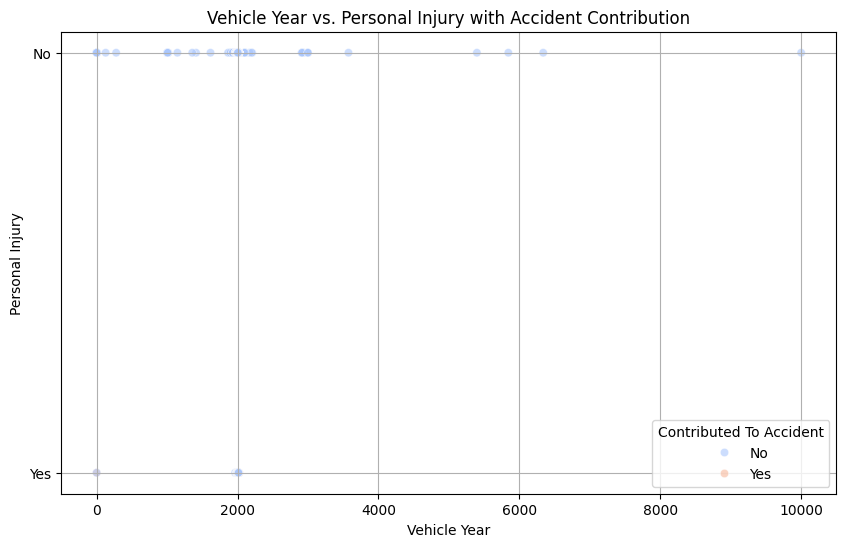

In [9]:
#time to add plots.
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Year', y='Personal.Injury', hue='Contributed.To.Accident', palette='coolwarm', alpha=0.6)

plt.title('Vehicle Year vs. Personal Injury with Accident Contribution')
plt.xlabel('Vehicle Year')
plt.ylabel('Personal Injury')
plt.grid(True)
plt.legend(title='Contributed To Accident')
plt.show()